Here we will plot some solutions to the problem we analyzed last week
$$u'\left(c_t\right) = \beta \left(1+r\right) u'\left(c_{t+1}\right)$$

In [7]:
using Plots 
using Distributions
using Parameters



In [108]:
Household = @with_kw (r = 0.00,                 
                      σ = 1.0,
                      β = 1.00,
                      T = 40,
                      y = ones(T+1,1),
                      a0 = 0.3,
                      u = σ == 1 ? x -> log(x) : x -> (x^(1 - σ) - 1) / (1 - σ)
					  )

##NamedTuple_kw#299 (generic function with 2 methods)

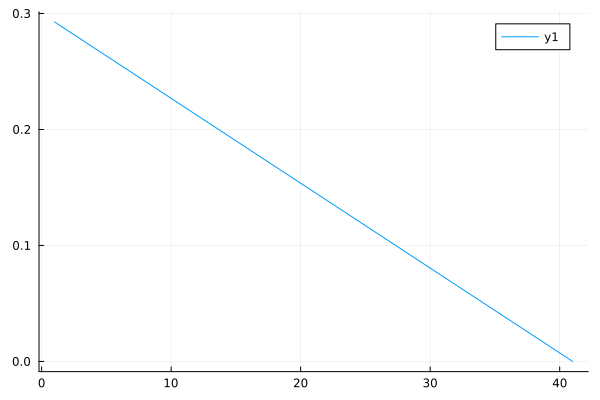

In [111]:
hh_par_1 = Household()

function get_lifetime_income!(hh)
    human_wealth     = 0 
    for i in hh.T+1:-1:1
        human_wealth = human_wealth / (1+hh.r) + hh.y[i,1]
    end
    financial_wealth = (1+hh.r) * hh.a0 

    wealth = (H = human_wealth, fin = financial_wealth)
    hh = merge(hh,wealth)
end

hh_1 = get_lifetime_income!(hh_par_1)

function get_solution!(hh)
    mpc_0 = 0
    c_ratio         = zeros(hh.T+1,1)
    c_opt           = zeros(hh.T+1,1)
    s_opt           = zeros(hh.T+1,1)
    intertemp_price = zeros(hh.T+1,1)
    for i in 1:hh.T+1
        c_ratio[i,1] = ((1 + hh.r) * hh.β) ^ ((1/hh.σ) * (i-1))
        
        intertemp_price[i,1] = (1/(1+hh.r)) ^ ((i-1))
    end

    mpc_0 = 1 / (sum(c_ratio.* intertemp_price))
    c_opt[:] .= mpc_0 .* (hh.H .+ hh.fin) .* c_ratio
    s_opt[1]  = hh.y[1] + (1+hh.r) * hh.a0 - c_opt[1]
    for i in 2:hh.T+1
        s_opt[i]  = hh.y[i] + (1+hh.r) * s_opt[i-1] - c_opt[i]
    end
    sol = (c = c_opt, s = s_opt)
    return hh_new = merge(hh,sol)
end

plot(hh_sol_1.s)

In [59]:
hh_1

(r = 0.0, σ = 1.0, β = 0.96, T = 40, y = [1.0; 1.0; … ; 1.0; 1.0;;], a0 = 0.3, u = var"#46#50"(), H = 41.0, fin = 0.3)

In [ ]:
# types 
x = 1
typeof(x)

In [ ]:
# types 
x = 1.0
typeof(x)

In [ ]:
typeof("Stokey, Lucas, and Prescott")

In [ ]:
typeof('m')

In [ ]:
# arithmetic operations
x = 2
y = 3.5

println("x + y = ",x + y)
println("x - y = ",x - y)
println("x * y = ",x * y)
println("x / y = ",x / y)
println("x ^ y = ",x ^ y)
println("x ÷ y = ",x ÷ y) #truncate to an integer
println("x % y = ",x % y) #reminder


In [ ]:
# logical 
x = true
y = false
println(!x)
println(!y)
println(x && !y)
println(x || y)

In [ ]:
# comparison 
x = 3
y = 21

println(x==y)
println(x!=y)
println(x<y)
println(x>=y)

In [ ]:
# functions - simple function
my_power(x,y) = x^y
println(my_power(2,5))
println(my_power(2,6))
#println(my_power(2,-3))
println(my_power(2.0,-3))

println(my_power(2,2) + my_power(2,3))

In [ ]:
# functions - more complicated
function my_mood(x)
    if x == 0
        return "meh..."
    elseif x > 0
        return "I'm happy!"
    elseif x < 0
        return "I'm sad..."
    end
end

println(my_mood(10))

In [ ]:
function how_does_it_work(x)
    y = 1 + x
    x
end

how_does_it_work(10)

In [ ]:
# keywords
function with_keyword(x; β = 0.2)
    x + β
end

with_keyword(0)
with_keyword(0, β = 0.4)

In [ ]:
function multiple_outputs(x,y)
    (x+y,x-y,x*y,x/y)
end

res = multiple_outputs(5,7)
println(res)
typeof(res)

In [ ]:
# tuple
my_tuple = (12,"hello?","Bernanke, Diamond, Dybvig")

println(my_tuple[1])
println(my_tuple[2])
println(my_tuple[3])

In [ ]:
# unpack tuple
a,b,c = my_tuple
d,e = my_tuple
d,e... = my_tuple

In [ ]:
# can i modify a tuple?
my_tuple[1] = ">>>???<<<"

In [ ]:
# named tuples
my_named_tuple = (α = 0.33, β = 0.9, r = 0.05)
my_named_tuple[3]
my_named_tuple.β
my_named_tuple[:β]


In [ ]:
# arrays and vectors

my_vector = [1,2,3,4,5.2]
typeof(my_vector)

In [ ]:
# make it a bit bigger...?

push!(my_vector,2.2)
pushfirst!(my_vector,0)



In [ ]:
# or smaller
pop!(my_vector)

In [ ]:
# this is an array
my_array = [1 2 3; 4 5 6]

In [ ]:
#some useful functions
println(length(my_array))
println(size(my_array))

In [ ]:
#refer to a particular element
println(my_array[1,2])
my_array[2,2] = 3
my_array

In [ ]:
A = zeros(3,3)

In [ ]:
B = ones(4,6)

In [ ]:
M = A[2:end,1:end]
N = B[3:end,4:end]
U  = M + N

x = A[1,:]
y = B[:,2]

In [ ]:
#broadcasting
x = [1,2,3,4,5,6,7,8,9,10]
cos.(x)


In [ ]:
A[1:3,1] .= -9
A

In [ ]:
# our first package! - you need to add it first
using Plots

function my_sine_plot(x)
    y = sin.(x)
    display(plot(x, y))
end

my_sine_plot([0,π/4,π/2,3π/4,π])



In [ ]:
# loops

x = 1

while x < 10 
    x = x + 1
    y = x ^ 2 
end

y

In [ ]:
A = zeros(20,20)
for i = 1:20
    for j = 1:20
    A[i,j] = i ^ 2 - j
    end
end
A

In [ ]:
B = zeros(10,5)
for j = 1:5
for i = 1:10
    if i < 5
        B[i,j] = i 
    else 
        B[i,j] = i ^ 2
    end
end
end

B

In [ ]:
dogs = ("pug","husky","bulldog","corgi","shiba inu")
for i in eachindex(dogs)
    println("This is a dog: ", dogs[i])
end


In [ ]:
# some more complicated examples

my_fun(x; y = 0.4) = x^y

x = collect(1:0.25:100) # creates a sequence of numbers
plot(my_fun.(x)) 
plot!(my_fun.(x,y=0.5))




In [ ]:
# my bisection function
function my_bisection(f::Function, a::Number, b::Number; tol::AbstractFloat=1e-5, maxiter::Integer=100)
    fa = f(a)
    fb = f(b)

    fa*fb <= 0 || error("No real root in [a,b]!")
    local c
    while b-a > tol
        c = (a+b)/2
        fc = f(c)
        if fc == 0
            break
        elseif fa*fc > 0
            a = c
            fa = fc
        else
            b = c
        end
    
    end
    return c
end

# we will test it...
funny_fun(x; α = 0.33) =   3*x ^ α - 20 
display(plot(funny_fun,0,1000))

root = my_bisection(funny_fun,0,1000)

println(root)